In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Divide & Clean the Data

In [2]:
df = pd.read_excel('full_egg.xlsx', parse_dates=True)
df

,Date,Region,Type,Form,Description,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2005-07-15,NATIONAL,CONVENTIONAL,SHELL,"BROWN, A, EXTRA LARGE, DOZ.",300.0,2.17,NaN,NaN
1,2005-07-15,NATIONAL,CONVENTIONAL,SHELL,"BROWN, A, LARGE, DOZ.",240.0,1.70,NaN,NaN
2,2005-07-15,NATIONAL,SPECIALTY,SHELL,"CAGE-FREE, BROWN, EXTRA LARGE",40.0,2.35,NaN,NaN
3,2005-07-15,NATIONAL,SPECIALTY,SHELL,"CAGE-FREE, BROWN, LARGE",200.0,2.78,NaN,NaN
4,2005-07-15,NATIONAL,SPECIALTY,SHELL,"CAGE-FREE, WHITE, LARGE",270.0,1.99,NaN,NaN
...,...,...,...,...,...,...,...,...,...
62610,2022-10-07,NORTHWEST,SPECIALTY,SHELL,"CAGE-FREE, BROWN, LARGE",16.0,3.19,3.19,3.19
62611,2022-10-07,SOUTHWEST,SPECIALTY,SHELL,"CAGE-FREE, BROWN, LARGE",11.0,3.19,3.19,3.19
62612,2022-10-07,SOUTHWEST,SPECIALTY,SHELL,"OMEGA-3, WHITE, LARGE",645.0,2.32,2.32,2.32
62613,2022-10-07,SOUTHWEST,ORGANIC,SHELL,"ORGANIC, BROWN, LARGE",25.0,4.99,4.99,4.99


In [3]:
shell = df.loc[df['Form'] == 'SHELL']
shell = shell.drop(columns=['Number of Stores', 'Form'])

In [4]:
national = shell.loc[shell['Region'] == 'NATIONAL']
national = national.drop(columns=['Low Price', 'High Price'])

In [5]:
regional = shell.loc[shell['Region'] != 'NATIONAL']
regional = regional.loc[shell['Region'] != 'ALASKA']
regional = regional.loc[shell['Region'] != 'HAWAII']

In [6]:
#regional.to_csv('regional.csv', index=False)
#national.to_csv('national.csv', index=False)

In [7]:
# Remove 1.5 Dozen Eggs Costs
national = national.loc[
      (national['Description'] != 'WHITE, A, EXTRA LARGE, 1.5 DOZ.')
    & (national['Description'] != 'WHITE, A, LARGE, 1.5 DOZ.')
    & (national['Description'] != 'WHITE, AA, LARGE, 1.5 DOZ.')
    & (national['Description'] != 'WHITE, AA, EXTRA LARGE, 1.5 DOZ.')
]

## Group the Data by Categories

In [8]:
white = [
    'WHITE, AA, LARGE, DOZ.',
    'WHITE, AA, EXTRA LARGE, DOZ.',
    'WHITE, A, LARGE, DOZ.',
    'WHITE, A, EXTRA LARGE, DOZ.',
    'VEG-FED, WHITE, LARGE',
    'VEG-FED, WHITE, EXTRA LARGE',
    'CAGE-FREE, WHITE, LARGE',
    'CAGE-FREE, WHITE, EXTRA LARGE',
    'OMEGA-3, WHITE, EXTRA LARGE',
    'OMEGA-3, WHITE, LARGE',
    'ORGANIC, WHITE, LARGE',   
    'ORGANIC, WHITE, EXTRA LARGE',
]

brown = [
    'BROWN, AA, LARGE, DOZ.',
    'BROWN, AA, EXTRA LARGE, DOZ.',
    'BROWN, A, EXTRA LARGE, DOZ.',
    'BROWN, A, LARGE, DOZ.',
    'VEG-FED, BROWN, EXTRA LARGE',
    'VEG-FED, BROWN, LARGE',
    'CAGE-FREE, BROWN, EXTRA LARGE',
    'CAGE-FREE, BROWN, LARGE',
    'OMEGA-3, BROWN, LARGE',
    'OMEGA-3, BROWN, EXTRA LARGE',
    'ORGANIC, BROWN, LARGE',
    'ORGANIC, BROWN, EXTRA LARGE',
]

white_large = [
    'WHITE, AA, LARGE, DOZ.',
    'WHITE, A, LARGE, DOZ.',
    'VEG-FED, WHITE, LARGE',
    'CAGE-FREE, WHITE, LARGE',
    'OMEGA-3, WHITE, LARGE',
    'ORGANIC, WHITE, LARGE',   
]

white_extra_large = [
    'WHITE, AA, EXTRA LARGE, DOZ.',
    'WHITE, A, EXTRA LARGE, DOZ.',
    'VEG-FED, WHITE, EXTRA LARGE',
    'CAGE-FREE, WHITE, EXTRA LARGE',
    'OMEGA-3, WHITE, EXTRA LARGE',
    'ORGANIC, WHITE, EXTRA LARGE',
]

brown_large = [
    'BROWN, AA, LARGE, DOZ.',
    'BROWN, A, LARGE, DOZ.',
    'VEG-FED, BROWN, LARGE',
    'CAGE-FREE, BROWN, LARGE',
    'OMEGA-3, BROWN, LARGE',
    'ORGANIC, BROWN, LARGE',
]

brown_extra_large = [
    'BROWN, AA, EXTRA LARGE, DOZ.'
    'BROWN, A, EXTRA LARGE, DOZ.',
    'VEG-FED, BROWN, EXTRA LARGE',
    'CAGE-FREE, BROWN, EXTRA LARGE',
    'OMEGA-3, BROWN, EXTRA LARGE',
    'ORGANIC, BROWN, EXTRA LARGE',
]


aa = [
    'WHITE, AA, LARGE, DOZ.',
    'WHITE, AA, EXTRA LARGE, DOZ.',
    'BROWN, AA, LARGE, DOZ.',
    'BROWN, AA, EXTRA LARGE, DOZ.'
]

a = [
    'BROWN, A, EXTRA LARGE, DOZ.',
    'BROWN, A, LARGE, DOZ.',
    'WHITE, A, LARGE, DOZ.',
    'WHITE, A, EXTRA LARGE, DOZ.',
]

vegfed = [
    'VEG-FED, BROWN, EXTRA LARGE',
    'VEG-FED, BROWN, LARGE',
    'VEG-FED, WHITE, LARGE',
    'VEG-FED, WHITE, EXTRA LARGE',
]

cagefree = [
    'CAGE-FREE, BROWN, EXTRA LARGE',
    'CAGE-FREE, BROWN, LARGE',
    'CAGE-FREE, WHITE, LARGE',
    'CAGE-FREE, WHITE, EXTRA LARGE',
]

omega3 = [
    'OMEGA-3, BROWN, LARGE',
    'OMEGA-3, BROWN, EXTRA LARGE',
    'OMEGA-3, WHITE, LARGE',
    'OMEGA-3, WHITE, EXTRA LARGE',
]

organic =[
    'ORGANIC, BROWN, LARGE',
    'ORGANIC, BROWN, EXTRA LARGE',
    'ORGANIC, WHITE, LARGE',   
    'ORGANIC, WHITE, EXTRA LARGE',
] 

large = [
    'BROWN, A, LARGE, DOZ.',
    'CAGE-FREE, BROWN, LARGE',
    'CAGE-FREE, WHITE, LARGE',
    'OMEGA-3, BROWN, LARGE',
    'OMEGA-3, WHITE, LARGE',
    'ORGANIC, BROWN, LARGE',
    'WHITE, A, LARGE, DOZ.',
    'WHITE, AA, LARGE, DOZ.',
    'ORGANIC, WHITE, LARGE',
    'BROWN, AA, LARGE, DOZ.',
    'VEG-FED, BROWN, LARGE',
    'VEG-FED, WHITE, LARGE',
]

extra_large = [
    'BROWN, A, EXTRA LARGE, DOZ.',
    'CAGE-FREE, BROWN, EXTRA LARGE',
    'OMEGA-3, BROWN, EXTRA LARGE',
    'WHITE, A, EXTRA LARGE, DOZ.',
    'OMEGA-3, WHITE, EXTRA LARGE',
    'WHITE, AA, EXTRA LARGE, DOZ.',
    'CAGE-FREE, WHITE, EXTRA LARGE',
    'ORGANIC, BROWN, EXTRA LARGE',
    'BROWN, AA, EXTRA LARGE, DOZ.',
    'ORGANIC, WHITE, EXTRA LARGE',
    'VEG-FED, BROWN, EXTRA LARGE',
    'VEG-FED, WHITE, EXTRA LARGE',
]

common_eggs = [
    'OMEGA-3, WHITE, EXTRA LARGE',
    'ORGANIC, BROWN, LARGE',
    'WHITE, A, EXTRA LARGE, DOZ.',
    'VEG-FED, BROWN, LARGE',
    'CAGE-FREE, BROWN, EXTRA LARGE'
]

## Exploratory Data Analysis

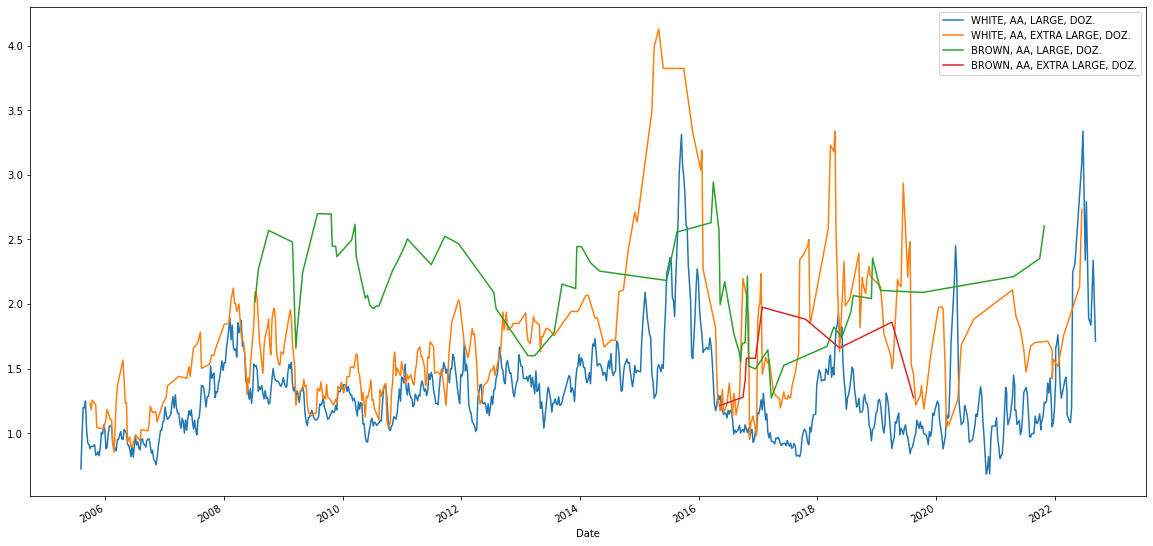

In [9]:
# AA eggs
fig, ax = plt.subplots(figsize=(20,10))
for egg in aa:
    national.loc[national['Description'] == egg].set_index('Date')[
        'Weighted Avg Price'].rolling(4).mean().plot(ax=ax, label=egg, legend=True)

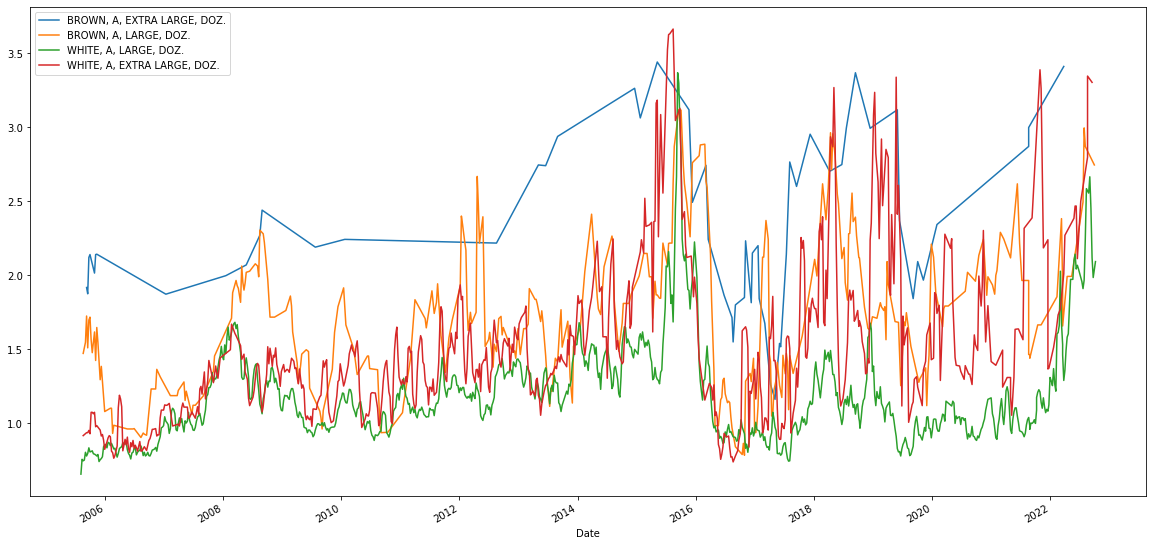

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
for egg in a:
    national.loc[national['Description'] == egg].set_index('Date')[
        'Weighted Avg Price'].rolling(4).mean().plot(ax=ax, label=egg, legend=True)

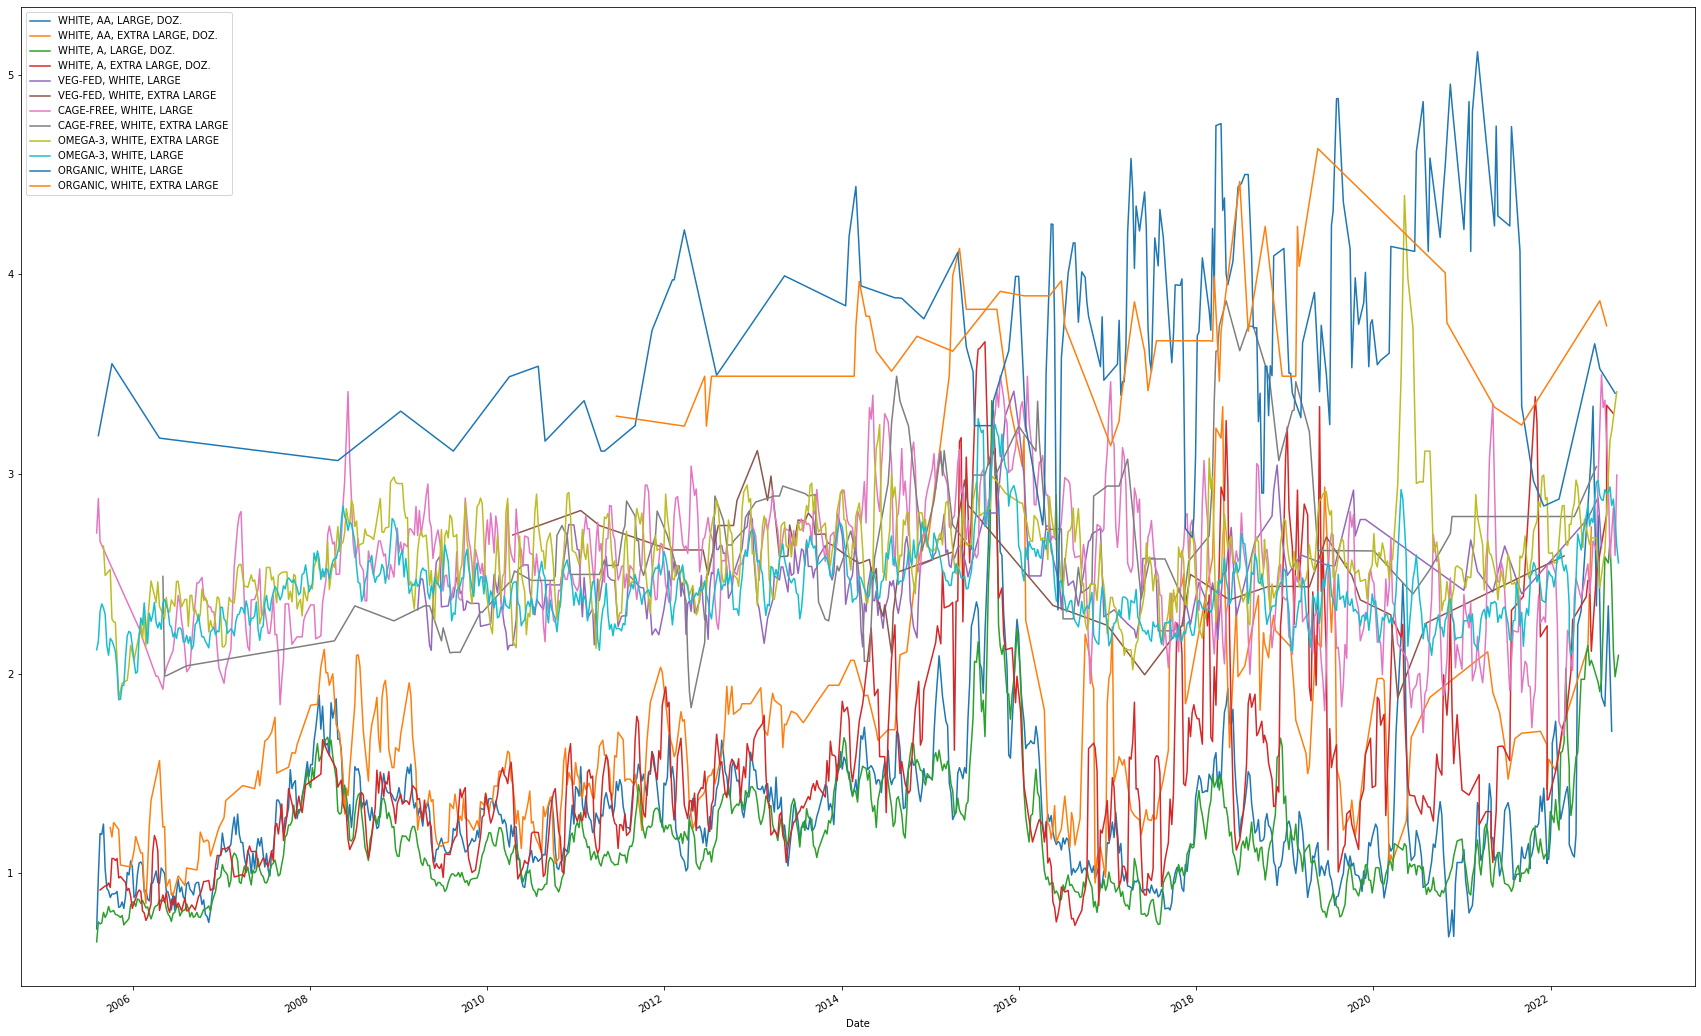

In [11]:
fig, ax = plt.subplots(figsize=(30,20))
for egg in white:
    national.loc[national['Description'] == egg].set_index('Date')[
        'Weighted Avg Price'].rolling(4).mean().plot(ax=ax, label=egg, legend=True)

## Average Yearly Price of Eggs

In [12]:
avg_yearly_price = pd.DataFrame()
years = range(2005,2023)
for year in years:
    add = national.set_index('Date')[f'{year}-01-01':f'{year}-12-31'].groupby(
        'Description')['Weighted Avg Price'].mean().rename(year)
    avg_yearly_price = pd.concat([avg_yearly_price, add], axis=1)
avg_yearly_price.T

,"BROWN, A, EXTRA LARGE, DOZ.","BROWN, A, LARGE, DOZ.","BROWN, AA, LARGE, DOZ.","CAGE-FREE, BROWN, EXTRA LARGE","CAGE-FREE, BROWN, LARGE","CAGE-FREE, WHITE, EXTRA LARGE","CAGE-FREE, WHITE, LARGE","OMEGA-3, BROWN, EXTRA LARGE","OMEGA-3, BROWN, LARGE","OMEGA-3, WHITE, EXTRA LARGE",...,"WHITE, A, LARGE, DOZ.","WHITE, AA, EXTRA LARGE, DOZ.","WHITE, AA, LARGE, DOZ.","ORGANIC, BROWN, EXTRA LARGE","BROWN, AA, EXTRA LARGE, DOZ.","ORGANIC, WHITE, EXTRA LARGE","VEG-FED, BROWN, EXTRA LARGE","VEG-FED, BROWN, LARGE","VEG-FED, WHITE, EXTRA LARGE","VEG-FED, WHITE, LARGE"
2005,2.022000,1.487222,1.390000,2.370000,2.374400,3.980000,2.581667,2.134167,2.396087,2.267857,...,0.778400,1.116667,0.932400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,1.050667,NaN,2.399091,2.382308,2.023333,2.203448,2.266667,2.412286,2.323659,...,0.836731,1.126071,0.936538,3.776429,NaN,NaN,NaN,NaN,NaN,NaN
2007,1.000000,1.285833,1.500000,2.663684,2.487885,NaN,2.288421,2.795000,2.512632,2.409778,...,1.116731,1.562667,1.234423,3.901176,NaN,NaN,NaN,NaN,NaN,NaN
2008,2.440000,1.980000,2.926667,2.554286,2.801731,2.290000,2.624211,2.270000,2.810000,2.708864,...,1.355385,1.776000,1.494615,3.552941,1.500,NaN,NaN,NaN,NaN,NaN
2009,1.500000,1.433333,2.291000,2.400000,2.873462,2.264000,2.612500,3.192500,2.792791,2.602857,...,1.041538,1.341250,1.244038,4.029000,NaN,4.190000,2.676667,2.574419,2.760000,2.352667
2010,3.000000,1.232727,2.156364,2.353077,2.906154,2.575455,2.518571,3.862857,3.017727,2.549375,...,1.062500,1.372222,1.185962,3.946250,1.180,NaN,2.481667,2.564082,2.500000,2.433913
2011,NaN,1.707143,2.418000,2.817917,2.836346,2.691250,2.607045,2.712308,2.941463,2.554167,...,1.168462,1.536944,1.377800,3.836170,NaN,2.990000,2.737222,2.890784,2.740000,2.360645
2012,2.690000,1.803448,1.385000,2.896923,2.862745,2.474667,2.634565,2.686923,3.083023,2.574898,...,1.250588,1.610000,1.348431,3.750270,NaN,3.490000,2.509048,2.798039,2.780000,2.490000
2013,3.020000,1.545600,2.235000,3.258571,2.905714,2.623077,2.727391,2.422500,3.039231,2.686667,...,1.284082,1.806316,1.327917,4.597143,NaN,3.990000,2.840278,2.819149,2.682222,2.525143
2014,3.990000,1.955263,1.910000,3.113684,3.056667,2.776111,2.897872,2.877778,3.281951,2.692340,...,1.445098,2.147857,1.505400,4.153571,NaN,3.740000,2.627500,2.790612,2.436364,2.408500


### Percent Changes by Common Eggs

In [13]:
for egg in common_eggs:
    print(f'\n{egg}')
    print(avg_yearly_price.T[egg].pct_change())


OMEGA-3, WHITE, EXTRA LARGE
2005         NaN
2006    0.024605
2007    0.037062
2008    0.124113
2009   -0.039133
2010   -0.020547
2011    0.001880
2012    0.008117
2013    0.043407
2014    0.002112
2015    0.017934
2016   -0.059258
2017   -0.085804
2018    0.082638
2019    0.016285
2020    0.076019
2021   -0.066724
2022    0.078848
Name: OMEGA-3, WHITE, EXTRA LARGE, dtype: float64

ORGANIC, BROWN, LARGE
2005         NaN
2006    0.055860
2007    0.037656
2008    0.107034
2009    0.037338
2010   -0.000050
2011    0.009835
2012    0.058170
2013    0.008291
2014    0.009825
2015   -0.010574
2016   -0.040666
2017   -0.005866
2018    0.013934
2019   -0.045038
2020    0.014207
2021   -0.010114
2022    0.084842
Name: ORGANIC, BROWN, LARGE, dtype: float64

WHITE, A, EXTRA LARGE, DOZ.
2005         NaN
2006   -0.026133
2007    0.292881
2008    0.150026
2009   -0.092738
2010    0.030610
2011    0.112316
2012    0.034397
2013   -0.049728
2014    0.271609
2015    0.459296
2016   -0.586410
2017    0

### By Group

<AxesSubplot:>

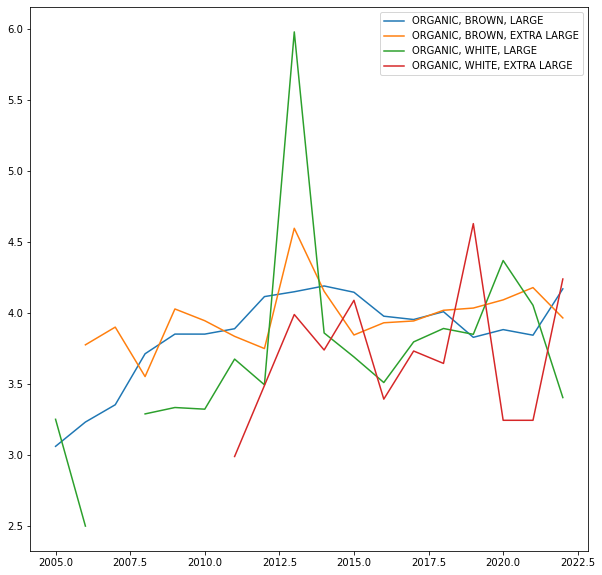

In [14]:
avg_yearly_price.T[organic].plot(figsize=(10,10))

<AxesSubplot:>

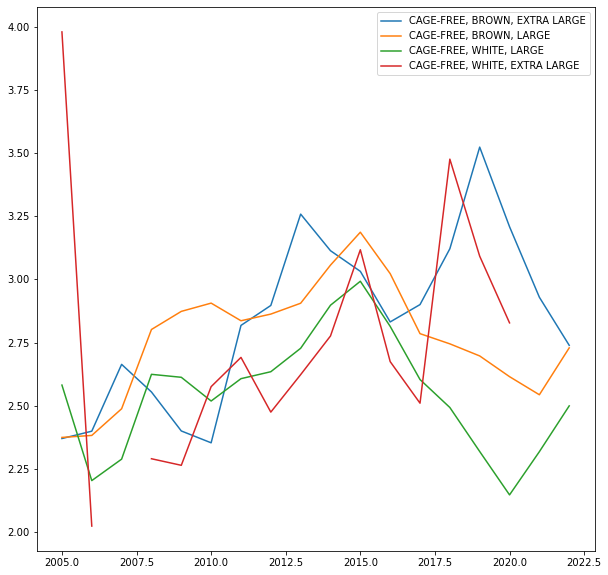

In [15]:
avg_yearly_price.T[cagefree].plot(figsize=(10,10))

<AxesSubplot:>

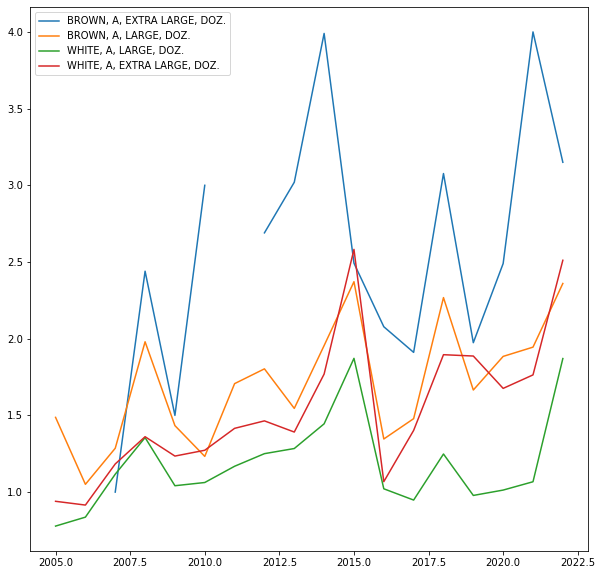

In [16]:
avg_yearly_price.T[a].plot(figsize=(10,10))

<AxesSubplot:>

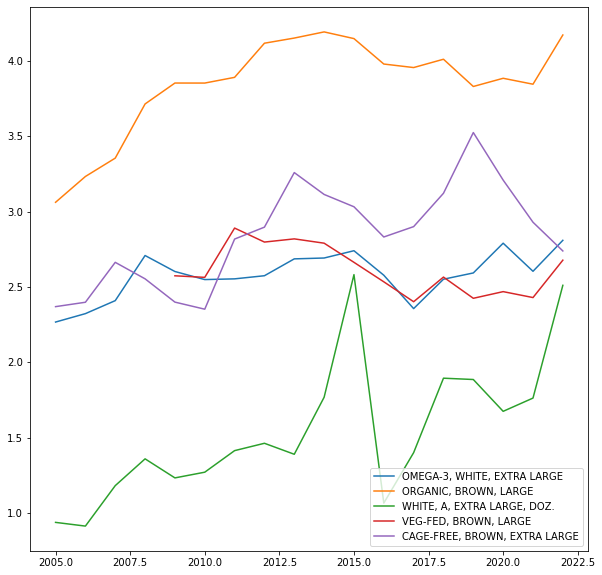

In [17]:
avg_yearly_price.T[common_eggs].plot(figsize=(10,10))

## Average Price for September 2022

In [18]:
national.set_index('Date')['2022-09-01':'2022-10-01'].groupby('Description')['Weighted Avg Price'].mean().sort_values()

Description
WHITE, AA, LARGE, DOZ.           0.990000
WHITE, A, LARGE, DOZ.            1.985000
BROWN, A, LARGE, DOZ.            2.500000
OMEGA-3, WHITE, LARGE            2.696000
CAGE-FREE, BROWN, LARGE          2.814000
CAGE-FREE, WHITE, LARGE          2.995000
CAGE-FREE, BROWN, EXTRA LARGE    3.000000
VEG-FED, BROWN, LARGE            3.000000
WHITE, A, EXTRA LARGE, DOZ.      3.330000
ORGANIC, WHITE, LARGE            3.500000
OMEGA-3, WHITE, EXTRA LARGE      3.553333
ORGANIC, BROWN, LARGE            4.436000
Name: Weighted Avg Price, dtype: float64

## Multiple Linear Regression
How do the different descriptors influence the price of an egg each year?

In [19]:
def eggType(row):
    if row['Description'] in a:
        return 'A'
    elif row['Description'] in aa:
        return 'AA'
    elif row['Description'] in vegfed:
        return 'VegFed'
    elif row['Description'] in cagefree:
        return 'CageFree'
    elif row['Description'] in omega3:
        return 'Omega3'
    elif row['Description'] in organic:
        return 'Organic'

def eggSize(row):
    if row['Description'] in large:
        return False
    elif row['Description'] in extra_large:
        return True
    
def eggColor(row):
    if row['Description'] in white:
        return False
    elif row['Description'] in brown:
        return True
    #elif row['Description'] == 'BROWN, A, EXTRA LARGE, DOZ.':
    #    return True
    #elif row['Description'] == 'BROWN, AA, EXTRA LARGE, DOZ.':
    #    return True

In [20]:
mlr = national.copy()
mlr['Classification'] = mlr.apply(eggType, axis=1)
mlr['ExtraLarge'] = mlr.apply(eggSize, axis=1)
mlr['Brown'] = mlr.apply(eggColor, axis=1)
mlr.head()

,Date,Region,Type,Description,Weighted Avg Price,Classification,ExtraLarge,Brown
0,2005-07-15,NATIONAL,CONVENTIONAL,"BROWN, A, EXTRA LARGE, DOZ.",2.17,A,True,True
1,2005-07-15,NATIONAL,CONVENTIONAL,"BROWN, A, LARGE, DOZ.",1.70,A,False,True
2,2005-07-15,NATIONAL,SPECIALTY,"CAGE-FREE, BROWN, EXTRA LARGE",2.35,CageFree,True,True
3,2005-07-15,NATIONAL,SPECIALTY,"CAGE-FREE, BROWN, LARGE",2.78,CageFree,False,True
4,2005-07-15,NATIONAL,SPECIALTY,"CAGE-FREE, WHITE, LARGE",1.99,CageFree,False,False


In [21]:
predictors = ['Classification', 'ExtraLarge', 'Brown']
X = pd.get_dummies(mlr[predictors], drop_first=True)
y = mlr['Weighted Avg Price']

linreg = LinearRegression()
linreg.fit(X, y)
print(f'Intercept: {linreg.intercept_:.3f}')
print('-----Coefficients----')
for name, coef in zip(X.columns, linreg.coef_):
    print(f'{name}: {coef}')

Intercept: 1.298
-----Coefficients----
ExtraLarge: 0.15442284934519865
Brown: 0.322966062662281
Classification_AA: 0.07532223372750897
Classification_CageFree: 1.201380834580824
Classification_Omega3: 1.1559226125188011
Classification_Organic: 2.263993651150402
Classification_VegFed: 1.0343225969296204


In [22]:
regression = pd.DataFrame(data = ['Intercept', 'ExtraLarge', 'Brown', 'AA',
                                      'CageFree', 'Omega3', 'Organic', 'VegFed'])
years = range(2005, 2023)
for year in years:
    timeframe = mlr.set_index('Date')[f'{year}-01-01':f'{year+1}-01-01']
    X = pd.get_dummies(timeframe[predictors], drop_first=True)
    y = timeframe['Weighted Avg Price']
    
    linreg = LinearRegression()
    linreg.fit(X, y)
    data = []
    data.append(linreg.intercept_)
    for coef in linreg.coef_:
        data.append(coef)
    dataframe = pd.DataFrame(data=data).rename(columns={0:year})
    regression = pd.concat([regression, dataframe], axis=1)
    print(f'-------------- {year} --------------')
    print(f'Intercept: {linreg.intercept_:.3f}')
    print('-----Coefficients----')
    for name, coef in zip(X.columns, linreg.coef_):
        print(f'{name}: {coef}')

-------------- 2005 --------------
Intercept: 0.997
-----Coefficients----
ExtraLarge: 0.13567509373946596
Brown: 0.30803224248246847
Classification_AA: -0.04367777985120336
Classification_CageFree: 1.189539715369108
Classification_Omega3: 1.0486179675398764
Classification_Organic: 1.843024530517695
-------------- 2006 --------------
Intercept: 0.822
-----Coefficients----
ExtraLarge: 0.12210698786897499
Brown: 0.19261549303920164
Classification_AA: 0.13824511033046744
Classification_CageFree: 1.3423872004188717
Classification_Omega3: 1.379491270776773
Classification_Organic: 2.2982251624912813
-------------- 2007 --------------
Intercept: 1.063
-----Coefficients----
ExtraLarge: 0.19731894858148394
Brown: 0.2184739370785526
Classification_AA: 0.20112503195065434
Classification_CageFree: 1.2094158968035624
Classification_Omega3: 1.234561964785795
Classification_Organic: 2.159170512791978
-------------- 2008 --------------
Intercept: 1.423
-----Coefficients----
ExtraLarge: 0.03960650813470

In [23]:
regression = regression.set_index(0).T
regression

,Intercept,ExtraLarge,Brown,AA,CageFree,Omega3,Organic,VegFed
2005,0.996535,0.135675,0.308032,-0.043678,1.189540,1.048618,1.843025,NaN
2006,0.821892,0.122107,0.192615,0.138245,1.342387,1.379491,2.298225,NaN
2007,1.062871,0.197319,0.218474,0.201125,1.209416,1.234562,2.159171,NaN
2008,1.422926,0.039607,0.346237,0.196296,1.070433,1.145005,1.894593,NaN
2009,1.116739,0.031762,0.314081,0.226259,1.368109,1.398333,2.465849,1.205261
2010,1.102619,0.071284,0.435092,0.180132,1.325047,1.412214,2.315454,1.076331
2011,1.271488,0.044328,0.395189,0.187174,1.236472,1.182121,2.173184,1.152095
2012,1.393142,-0.032098,0.350056,0.051501,1.170579,1.177480,2.222807,1.045481
2013,1.278799,0.167143,0.338335,0.176876,1.351291,1.280702,2.659822,1.179307
2014,1.570643,0.068838,0.396708,0.054971,1.176790,1.078611,2.187482,0.780736


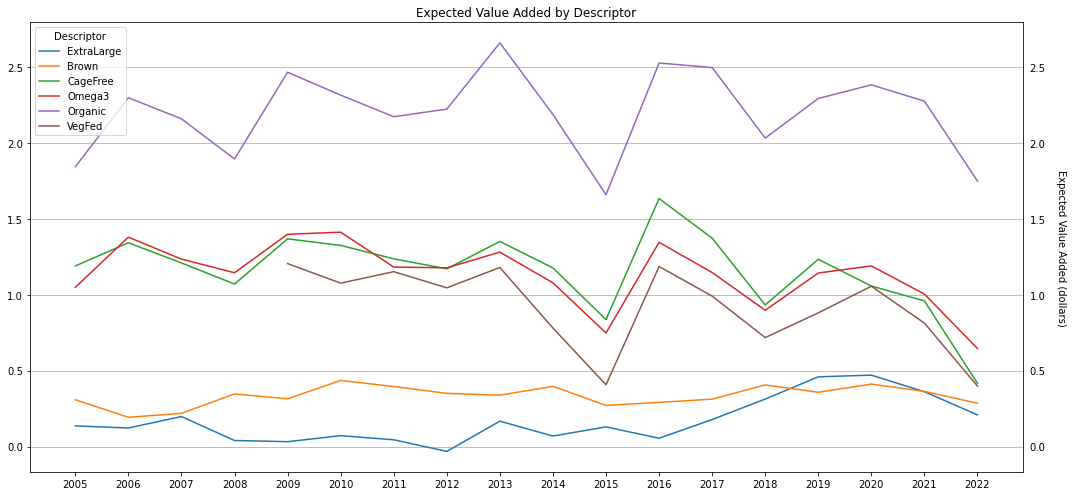

In [24]:
ax = regression.drop(columns=['Intercept', 'AA']).plot(figsize=(15,7))
plt.xticks(np.arange(2005,2023))
plt.ylabel('Expected Value Added (dollars)',rotation=270, labelpad=20)
ax.yaxis.set_label_position('right')
plt.legend(title='Descriptor',loc='upper left')
plt.tick_params(axis='y', which='both', labelleft=True, labelright=True)
plt.grid(axis='y')
plt.title('Expected Value Added by Descriptor')
plt.tight_layout()
plt.savefig('mlr.jpeg', dpi=300)
plt.show()

## 2022 Monthly Averages for Eggs

In [25]:
for month in range(1,11):
    monthly = national.set_index('Date')[f'2022-{month:02}-01':f'2022-{month+1:02}-01'].groupby(
        'Description')['Weighted Avg Price'].mean().sort_values()
    print(month)
    print(monthly)
    print('\n\n')

1
Description
WHITE, A, LARGE, DOZ.            1.267500
WHITE, AA, EXTRA LARGE, DOZ.     1.270000
WHITE, A, EXTRA LARGE, DOZ.      1.550000
WHITE, AA, LARGE, DOZ.           1.696000
CAGE-FREE, WHITE, LARGE          1.843333
CAGE-FREE, BROWN, LARGE          2.412500
OMEGA-3, WHITE, EXTRA LARGE      2.466667
CAGE-FREE, BROWN, EXTRA LARGE    2.495000
OMEGA-3, BROWN, LARGE            2.516667
OMEGA-3, WHITE, LARGE            2.587500
VEG-FED, BROWN, LARGE            2.660000
VEG-FED, BROWN, EXTRA LARGE      3.000000
ORGANIC, BROWN, LARGE            4.142500
ORGANIC, BROWN, EXTRA LARGE      4.740000
Name: Weighted Avg Price, dtype: float64



2
Description
WHITE, AA, LARGE, DOZ.           1.336667
BROWN, A, LARGE, DOZ.            1.650000
WHITE, A, LARGE, DOZ.            1.660000
CAGE-FREE, WHITE, LARGE          1.700000
WHITE, A, EXTRA LARGE, DOZ.      1.940000
CAGE-FREE, BROWN, EXTRA LARGE    2.000000
VEG-FED, BROWN, LARGE            2.340000
OMEGA-3, BROWN, LARGE            2.400000
WHIT

## Common Eggs

In [26]:
common = national.loc[national['Description'].isin(common_eggs)]
common = common.groupby(by=[pd.PeriodIndex(common['Date'], freq='M'), 
                          'Description'], as_index=True)['Weighted Avg Price'].mean().to_frame()
common

Weighted Avg Price
Date    Description                                      
2005-07 CAGE-FREE, BROWN, EXTRA LARGE            2.350000
        ORGANIC, BROWN, LARGE                    2.203333
        WHITE, A, EXTRA LARGE, DOZ.              0.865000
2005-08 CAGE-FREE, BROWN, EXTRA LARGE            2.490000
        OMEGA-3, WHITE, EXTRA LARGE              2.856667
...                                                   ...
2022-09 OMEGA-3, WHITE, EXTRA LARGE              3.553333
        ORGANIC, BROWN, LARGE                    4.436000
        VEG-FED, BROWN, LARGE                    3.000000
        WHITE, A, EXTRA LARGE, DOZ.              3.330000
2022-10 ORGANIC, BROWN, LARGE                    5.180000

[938 rows x 1 columns]

### Graphing Percent Change
The price of White, A, Extra Large, Doz. is more volatile

<AxesSubplot:xlabel='Date'>

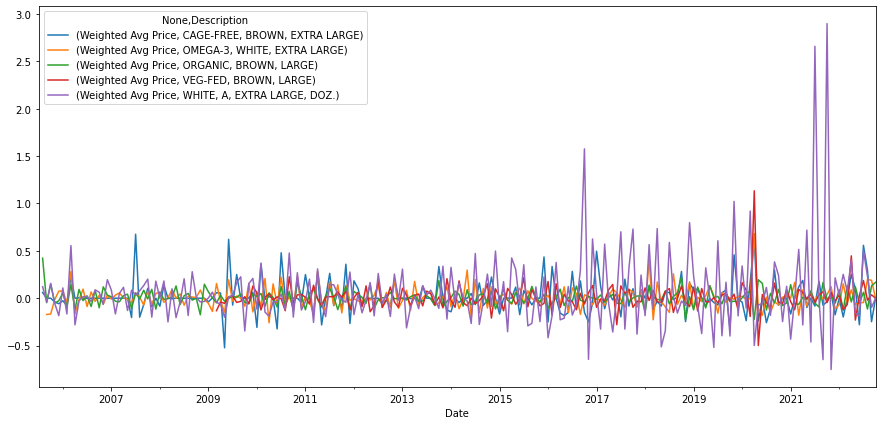

In [27]:
common.unstack().pct_change().plot(figsize=(15, 7))

### Monthly Average Price

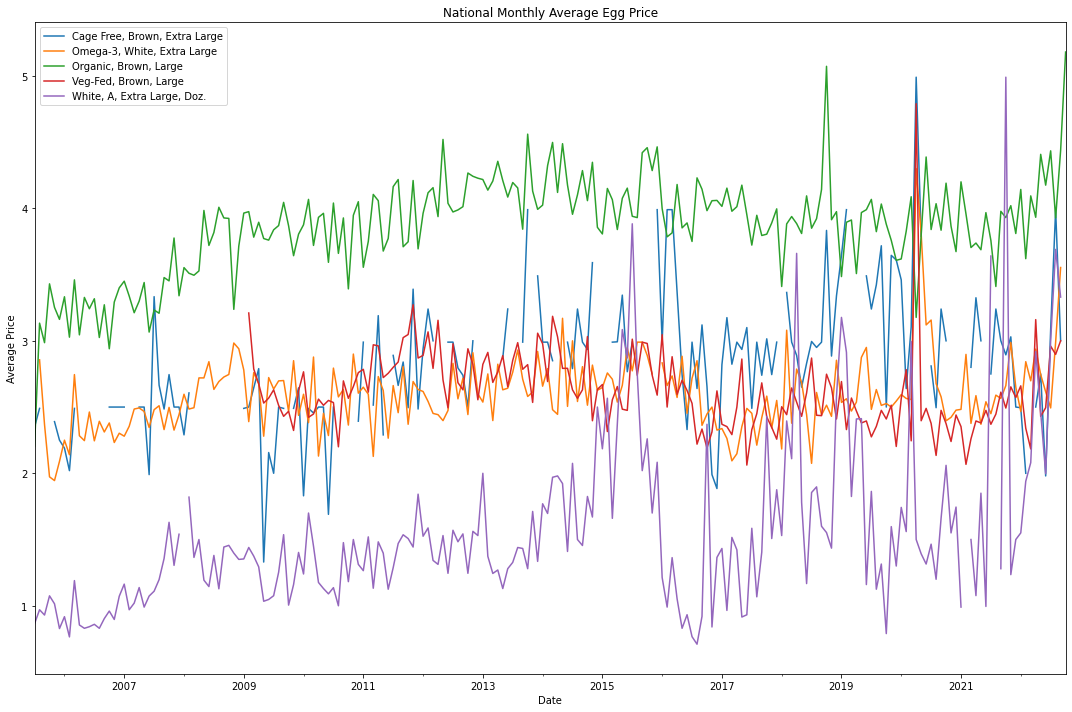

In [28]:
common.unstack().plot(figsize=(15,10))
plt.legend(labels=['Cage Free, Brown, Extra Large', 'Omega-3, White, Extra Large', 'Organic, Brown, Large', 'Veg-Fed, Brown, Large', 'White, A, Extra Large, Doz.'])
plt.ylabel('Average Price')
plt.title('National Monthly Average Egg Price')
plt.tight_layout()
plt.show()